In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [61]:
lsm = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing5_n10/evaluations/lsm.csv')
# 3072, 4096, 5120, 6144, 7168, 8192, 9216, 10240, 11264, 12288, 13312, 14336, 15360, 16384
rl = pd.read_csv('/Users/alexanderithakis/Documents/GitHub/D4PG-QR-FRM/logs/MonthlySwing5_n10/evaluations/rl_episode_8192.csv')
# Create a new column in the rl DataFrame which sums per path up to each and including each time step the q_t
lsm['Q_t'] = lsm.groupby('path')['q_t'].cumsum()
rl['Q_t'] = rl.groupby('path')['q_t'].cumsum()

lsm['payoff'] = np.maximum(lsm['spot'] - 1, 0) * lsm['q_t']
rl['payoff'] = np.maximum(rl['spot'] - 1, 0) * rl['q_t']

lsm.sort_values(by=['path', 'time_step'], inplace=True)
rl.sort_values(by=['path', 'time_step'], inplace=True)

rl.query('path == 0')

# rl

,path,time_step,Payoff,q_exercised_norm,q_remaining_norm,time_to_maturity_norm,normalized_time,spot,X_t,Y_t,days_since_exercise_norm,q_t,reward,Q_t,payoff
0,0,0,0.000000,0.000000,1.000000,1.047619,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,1,-0.034423,0.000000,1.000000,1.000000,0.045455,0.965577,-0.035029,0.000000,0.045455,0.000000,-0.000000,0.000000,0.000000
2,0,2,-0.067832,0.000000,1.000000,0.952381,0.090909,0.932168,-0.070242,0.000000,0.090909,0.000000,-0.000000,0.000000,0.000000
3,0,3,0.342488,0.000000,1.000000,0.904762,0.136364,1.342488,-0.098960,0.393484,0.136364,1.999973,0.684423,1.999973,0.684967
4,0,4,0.245862,0.099999,0.900001,0.857143,0.181818,1.245862,0.002797,0.217031,0.045455,1.999984,0.491233,3.999957,0.491720
5,0,5,0.192850,0.199998,0.800002,0.809524,0.227273,1.192850,0.056639,0.119706,0.045455,1.999982,0.385238,5.999939,0.385697
6,0,6,0.228535,0.299997,0.700003,0.761905,0.272727,1.228535,0.139797,0.066025,0.045455,1.999994,0.456434,7.999933,0.457069
7,0,7,0.316947,0.399997,0.600003,0.714286,0.318182,1.316947,0.238899,0.036417,0.045455,1.999995,0.632888,9.999928,0.633892
8,0,8,0.282335,0.499996,0.500004,0.666667,0.363636,1.282335,0.228596,0.020086,0.045455,1.999995,0.563661,11.999923,0.564669
9,0,9,0.279212,0.599996,0.400004,0.619048,0.409091,1.279212,0.235165,0.011079,0.045455,1.999995,0.557316,13.999918,0.558423


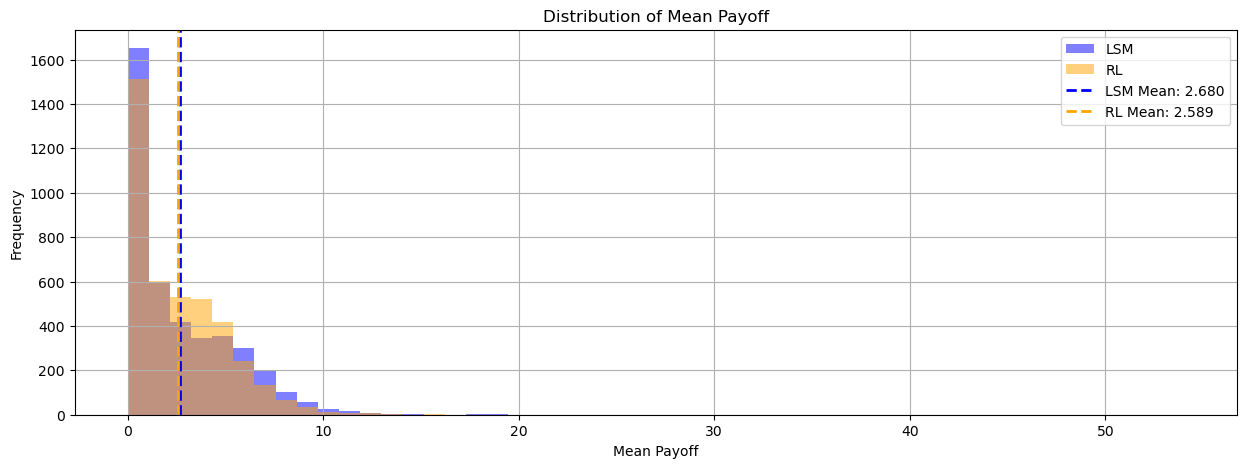

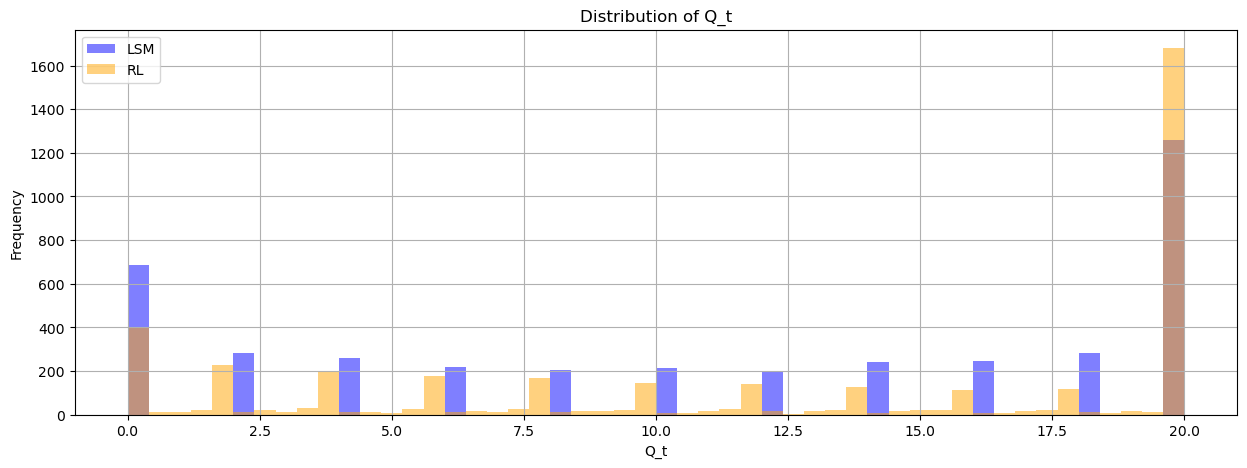

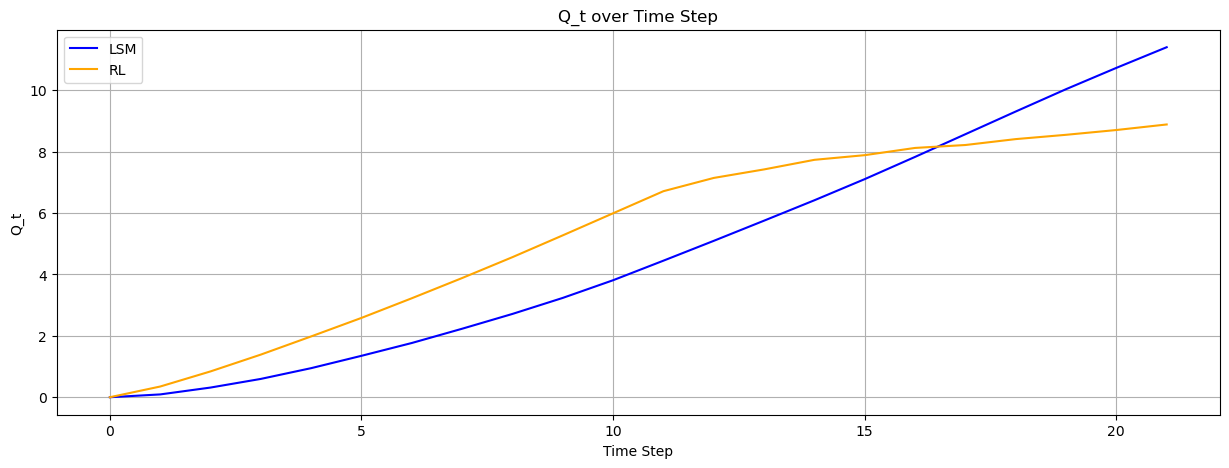

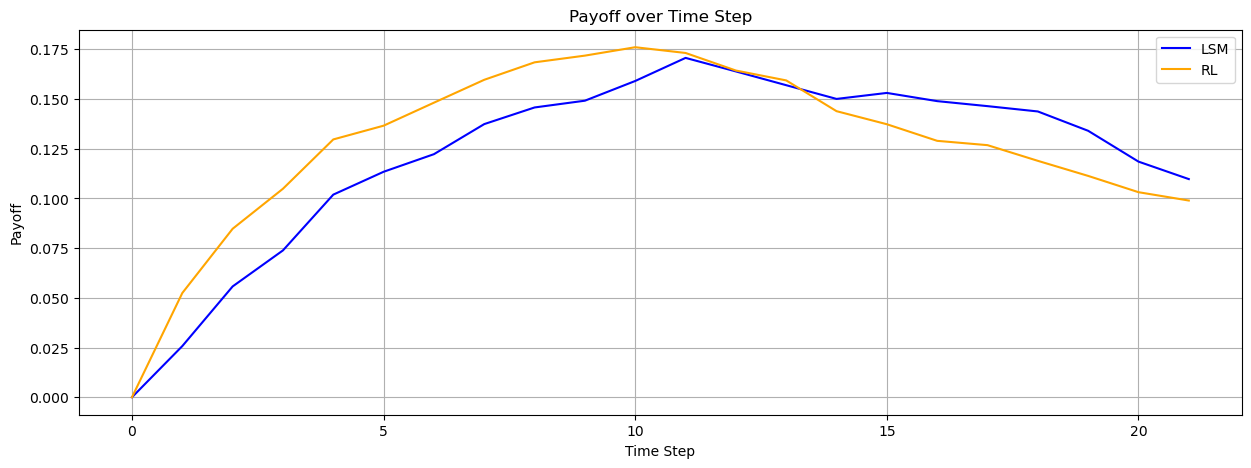

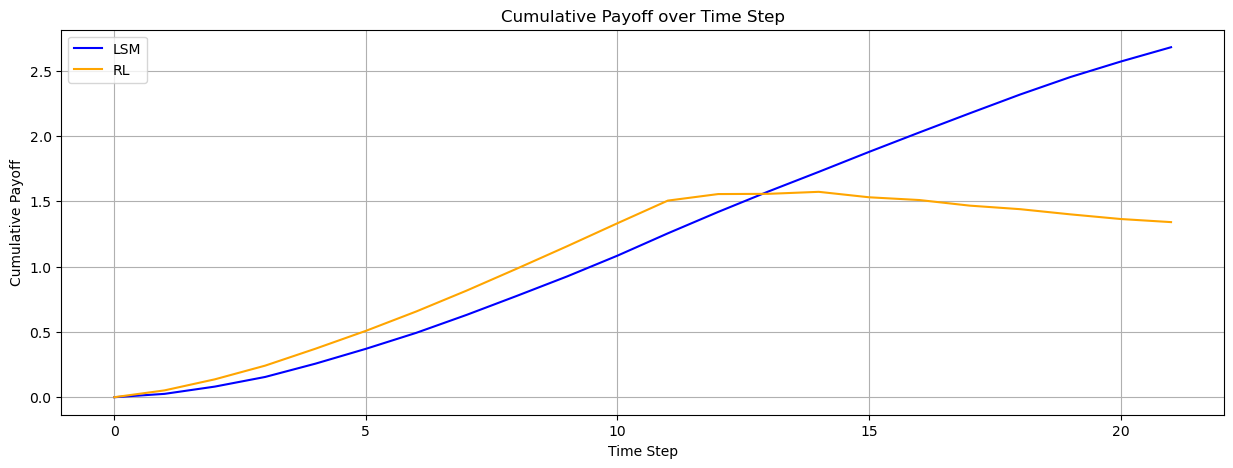

In [64]:
grouped_lsm = lsm.groupby('path').agg({'Q_t': 'last', 'time_step': 'max', 'payoff': 'sum'}).reset_index()
grouped_rl = rl.groupby('path').agg({'Q_t': 'last', 'time_step': 'max', 'payoff': 'sum'}).reset_index()

# Plot distribution of mean payoff for both lsm and rl
plt.figure(figsize=(15, 5))
plt.hist(grouped_lsm['payoff'], bins=50, alpha=0.5, label='LSM', color='blue')  
plt.hist(grouped_rl['payoff'], bins=50, alpha=0.5, label='RL', color='orange')

# Calculate means - and add them as vertical lines
mean_lsm = grouped_lsm['payoff'].mean()
mean_rl = grouped_rl['payoff'].mean()
plt.axvline(mean_lsm, color='blue', linestyle='dashed', linewidth=2, label=f'LSM Mean: {mean_lsm:.3f}')
plt.axvline(mean_rl, color='orange', linestyle='dashed', linewidth=2, label=f'RL Mean: {mean_rl:.3f}')

plt.title('Distribution of Mean Payoff')
plt.xlabel('Mean Payoff')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

# plot distribution of Q_t for both lsm and rl
plt.figure(figsize=(15, 5))
plt.hist(grouped_lsm['Q_t'], bins=50, alpha=0.5, label='LSM', color='blue')
plt.hist(grouped_rl['Q_t'], bins=50, alpha=0.5, label='RL', color='orange')
plt.title('Distribution of Q_t')
plt.xlabel('Q_t')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

lsm['Payoff_t'] = lsm.groupby('path')['payoff'].cumsum()
rl['Payoff_t'] = rl.groupby('path')['payoff'].cumsum()
grouped_lsm_t = lsm.groupby('time_step').agg({'Q_t': 'mean','payoff': 'mean', 'Payoff_t': 'mean'}).reset_index()
grouped_rl_t = rl.groupby('time_step').agg({'Q_t': 'mean','payoff': 'mean', 'Payoff_t': 'mean'}).reset_index()

# plot Q_t over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['Q_t'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['Q_t'], label='RL', color='orange')
plt.title('Q_t over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Q_t')
plt.legend()
plt.grid(True)
plt.show()

# plot payoff over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['payoff'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['payoff'], label='RL', color='orange')
plt.title('Payoff over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Payoff')
plt.legend()
plt.grid(True)
plt.show()

# plot cumulative payoff over time_step for both lsm and rl
plt.figure(figsize=(15, 5))
plt.plot(grouped_lsm_t['time_step'], grouped_lsm_t['Payoff_t'], label='LSM', color='blue')
plt.plot(grouped_rl_t['time_step'], grouped_rl_t['Payoff_t'], label='RL', color='orange')
plt.title('Cumulative Payoff over Time Step')
plt.xlabel('Time Step')
plt.ylabel('Cumulative Payoff')
plt.legend()
plt.grid(True)
plt.show()